# Exploratory Data Analysis On India Census 2011 data

Problem Statement:

Perform 'Exploratory Data Analysis' on dataset 'Indian Census 2011'.This task focuses on a Government of India who will try to
figure out varous question regarding Indian population(e.g., which states is the most populated,which states have low literacy
rates,regional diversities within the states etc.) where the Govt. can work to control population make better standard of living.

importing neccessay libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlalchemy

I imported sqlalchemy because Census dataset is present in my SQL database.

In [2]:
#importing the dataset
engine = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/data_analysis')

In [3]:
#for displaying all rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_sql_table("census",engine)
df.head()  #first five values of the dataset

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_workers,Female_workers,Household_worker,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduation_education,Age_Group_0_29,Age_group_30_49,Age_group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [106]:
#setting district code as a index
df.set_index('District_code',inplace=True)

In [107]:
#Last five values of the dataset
df.tail()

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_workers,Female_workers,Household_worker,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduation_education,Age_Group_0_29,Age_group_30_49,Age_group_50
District_code,,,,,,,,,,,,,,,,,,,,,,
636,PONDICHERRY,Mahe,41816,19143,22673,36470,11802,9093,2709,69,27940,12856,958,3,21,14,8773,5711,4475,19760,12543,9428
637,PONDICHERRY,Karaikal,200222,97809,102413,154916,68301,53139,15162,1327,152638,28835,18391,46,63,54,29456,15930,18998,102333,60089,37434
638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,2560,8681,1336,26077,343,119,0,6325,3668,1300,18786,12088,5922
639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,260,81163,2165,21870,77,84,4,12707,10042,5133,57350,30741,17464
640,ANDAMAN AND NICOBAR ISLANDS,South Andaman,238142,127283,110859,190266,96831,77563,19268,907,174452,28912,33037,866,135,27,42150,29910,22388,128402,76332,33128


In [6]:
#shape of the dataset
df.shape

(640, 23)

As we see our dataset have 640 rows and 23 columns

In [7]:
#summary of the dataset
df.describe()

,District_code,Population,Male,Female,Literate,Workers,Male_workers,Female_workers,Household_worker,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduation_education,Age_Group_0_29,Age_group_30_49,Age_group_50
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,7.529514e+05,5.186561e+05,2.342953e+05,28653.387500,1.509777e+06,2.691331e+05,4.346811e+04,3.255174e+04,13192.143750,6955.864062,2.051046e+05,1.241736e+05,1.090132e+05,1.102826e+06,4.820189e+05,3.001005e+05
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,6.071622e+05,4.412388e+05,1.913541e+05,38513.020711,1.279535e+06,4.201270e+05,1.087273e+05,1.603859e+05,56347.946567,23624.010655,2.164778e+05,1.304154e+05,1.502260e+05,8.887434e+05,4.183230e+05,2.549556e+05
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,3.555000e+03,2.228000e+03,1.327000e+03,68.000000,8.730000e+02,7.400000e+01,1.710000e+02,3.000000e+00,1.000000,0.000000,8.090000e+02,6.560000e+02,3.560000e+02,5.113000e+03,2.088000e+03,7.860000e+02
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,3.284688e+05,2.294168e+05,9.420350e+04,8563.500000,5.670698e+05,2.623725e+04,1.951750e+03,2.537500e+02,163.750000,124.750000,7.078575e+04,4.234700e+04,2.799200e+04,4.786540e+05,2.101965e+05,1.193285e+05
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,6.223410e+05,4.288515e+05,1.929265e+05,16586.500000,1.291930e+06,1.176915e+05,6.079500e+03,7.375000e+02,372.000000,741.000000,1.523325e+05,8.998700e+04,6.624350e+04,8.896820e+05,3.905085e+05,2.421020e+05
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,1.036544e+06,6.991510e+05,3.163658e+05,35126.250000,2.116407e+06,3.515840e+05,2.750850e+04,2.800000e+03,1942.500000,4150.750000,2.629160e+05,1.583555e+05,1.299488e+05,1.491204e+06,6.525142e+05,4.045875e+05
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.492767e+06,3.363123e+06,1.239177e+06,466007.000000,8.716055e+06,4.707573e+06,1.248137e+06,1.863408e+06,668050.000000,343639.000000,2.018079e+06,1.196965e+06,1.733274e+06,6.184519e+06,3.241888e+06,1.921143e+06


In [8]:
#population summary
df.Population.describe()

count    6.400000e+02
mean     1.891961e+06
std      1.544380e+06
min      8.004000e+03
25%      8.178610e+05
50%      1.557367e+06
75%      2.583551e+06
max      1.106015e+07
Name: Population, dtype: float64

In [9]:
#checking null values in the dataset
df.isnull().sum()

District_code           0
State_name              0
District_name           0
Population              0
Male                    0
Female                  0
Literate                0
Workers                 0
Male_workers            0
Female_workers          0
Household_worker        0
Hindus                  0
Muslims                 0
Christians              0
Sikhs                   0
Buddhists               0
Jains                   0
Secondary_Education     0
Higher_Education        0
Graduation_education    0
Age_Group_0_29          0
Age_group_30_49         0
Age_group_50            0
dtype: int64

In [10]:
#Total number of values and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_workers          640 non-null    int64 
 9   Female_workers        640 non-null    int64 
 10  Household_worker      640 non-null    int64 
 11  Hindus                640 non-null    int64 
 12  Muslims               640 non-null    int64 
 13  Christians            640 non-null    int64 
 14  Sikhs                 640 non-null    int64 
 15  Buddhists             640 non-null    in

In [11]:
#Columns in the dataset
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_workers', 'Female_workers',
       'Household_worker', 'Hindus', 'Muslims', 'Christians', 'Sikhs',
       'Buddhists', 'Jains', 'Secondary_Education', 'Higher_Education',
       'Graduation_education', 'Age_Group_0_29', 'Age_group_30_49',
       'Age_group_50'],
      dtype='object')

In [12]:
#Total number of duplicate values in the dataset
df.duplicated().sum()

0

In [13]:
#The number of unique values of each columns
df.nunique()

District_code           640
State_name               35
District_name           634
Population              640
Male                    640
Female                  640
Literate                640
Workers                 640
Male_workers            640
Female_workers          640
Household_worker        632
Hindus                  640
Muslims                 639
Christians              622
Sikhs                   565
Buddhists               511
Jains                   546
Secondary_Education     640
Higher_Education        640
Graduation_education    637
Age_Group_0_29          640
Age_group_30_49         640
Age_group_50            639
dtype: int64

## State-wise Total Population

In [14]:
df.groupby('State_name')[['Population']].sum().sort_values(by='Population',ascending=False)

,Population
State_name,
UTTAR PRADESH,199812341
MAHARASHTRA,112374333
BIHAR,104099452
WEST BENGAL,91276115
ANDHRA PRADESH,84580777
MADHYA PRADESH,72626809
TAMIL NADU,72147030
RAJASTHAN,68548437
KARNATAKA,61095297


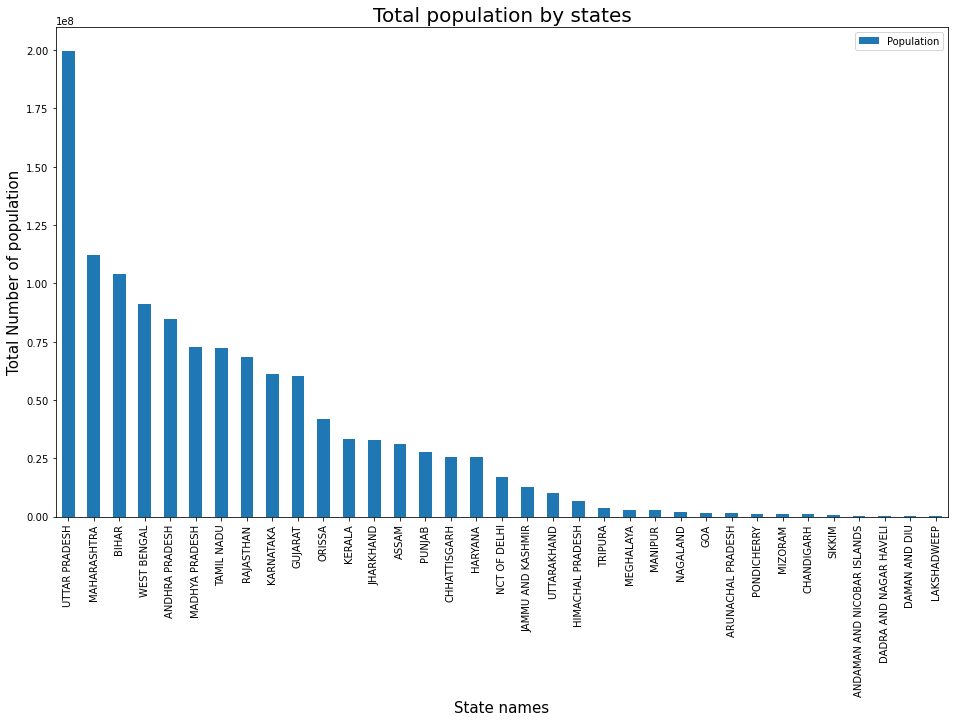

In [15]:
#using bar graph for depicting result
df.groupby('State_name')[['Population']].sum().sort_values(by='Population',ascending=False).plot.bar(figsize=(16,9))
plt.title('Total population by states',fontsize=20)
plt.xlabel('State names',fontsize=15)
plt.ylabel('Total Number of population',fontsize=15)
plt.show()

Observation:

In 2011 top 3 populated states are Uttar pradesh,Maharashtra and Bihar

In [ ]:
MALE and FEMALE DISTRIBUTION IN EACH STATE

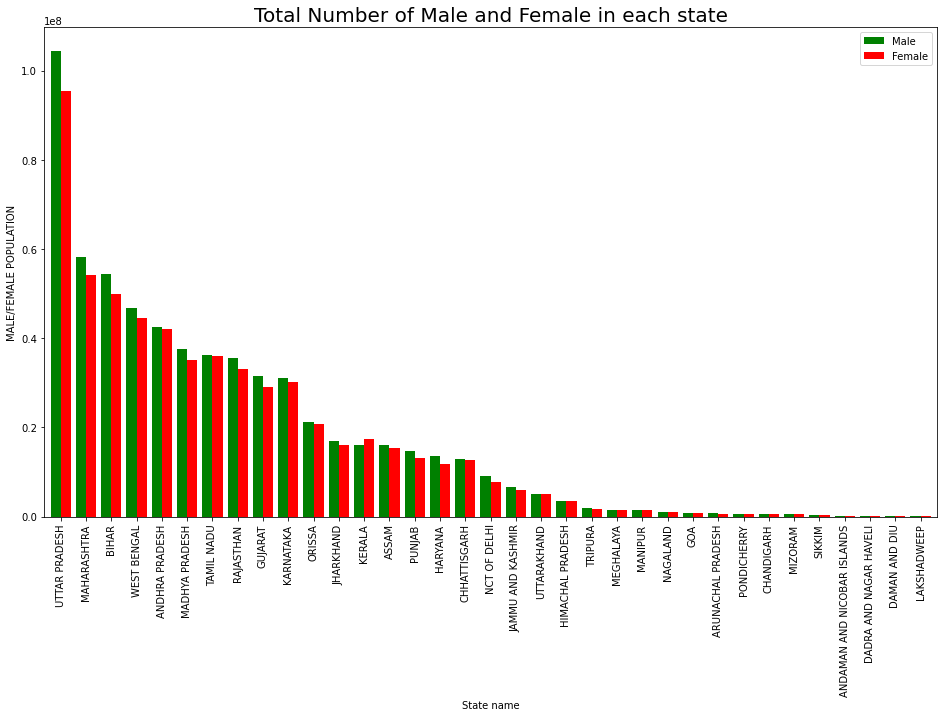

In [105]:
df.groupby('State_name')[['Male','Female']].sum().sort_values(by=['Male','Female'],ascending=False).plot.bar(figsize=(16,9),
width=0.8,color=['green','red'])
plt.title('Total Number of Male and Female in each state',fontsize=20)
plt.xlabel('State name')
plt.ylabel('MALE/FEMALE POPULATION')
plt.show()

Observation:
    
Maximum number of males and females resides in uttar pradesh because UP is highly populated state.
On the other hand lakshadweep has least number of male and female due to small number of population.

## Total Number of population with different religion

In [17]:
df.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains']].sum().sort_values(by=
['Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains'],
ascending=False)

,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
UTTAR PRADESH,159312654,38483967,356448,643500,206285,213267
MAHARASHTRA,89703057,12971152,1080073,223247,6531200,1400349
BIHAR,86078686,17557809,129247,23779,25453,18914
ANDHRA PRADESH,74824149,8082412,1129784,40244,36692,53849
MADHYA PRADESH,66007121,4774695,213282,151412,216052,567028
WEST BENGAL,64385546,24654825,658618,63523,282898,60141
TAMIL NADU,63188168,4229479,4418331,14601,11186,89265
RAJASTHAN,60657103,6215377,96430,872930,12185,622023
GUJARAT,53533988,5846761,316178,58246,30483,579654


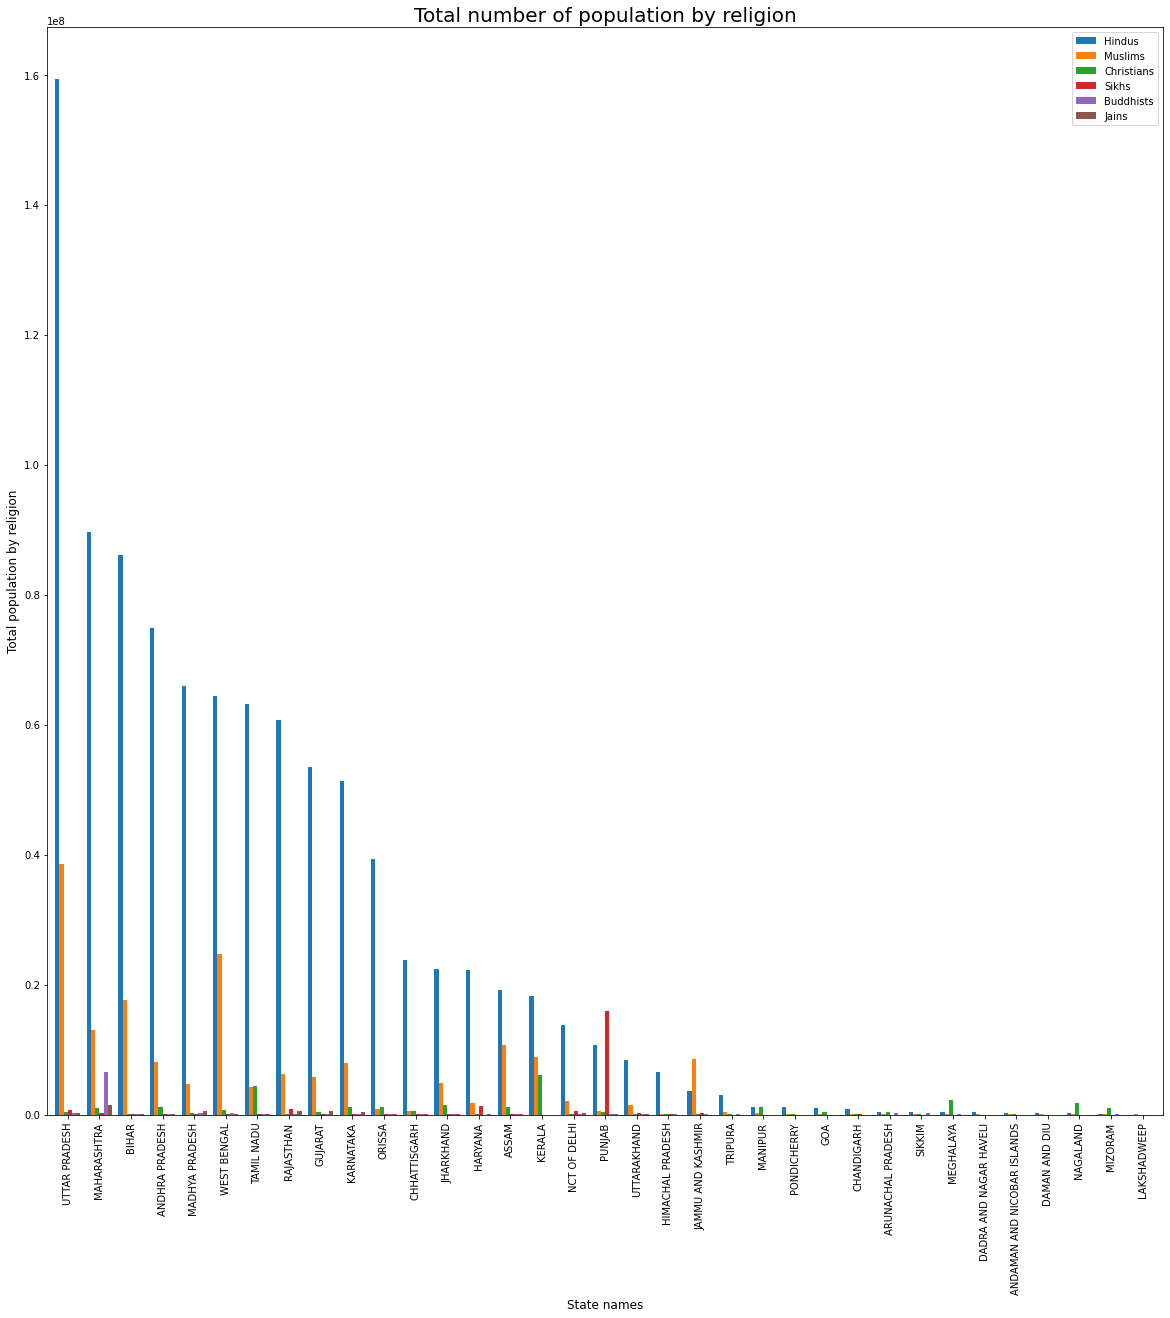

In [18]:
#Making visualization
df.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains']].sum().sort_values(by=
['Hindus', 'Muslims', 'Christians', 'Sikhs','Buddhists', 'Jains'],ascending=False).plot.bar(figsize=(20,20),width=0.8)
plt.title("Total number of population by religion",fontsize=20)
plt.xlabel('State names',fontsize=12)
plt.ylabel('Total population by religion',fontsize=12)
plt.show()

Observation 2:

Hindus and Muslim are the top 2 religion in total number of population

In [19]:
df.head(2)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_workers,Female_workers,Household_worker,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduation_education,Age_Group_0_29,Age_group_30_49,Age_group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978


## Total Percentage of workers working in each state

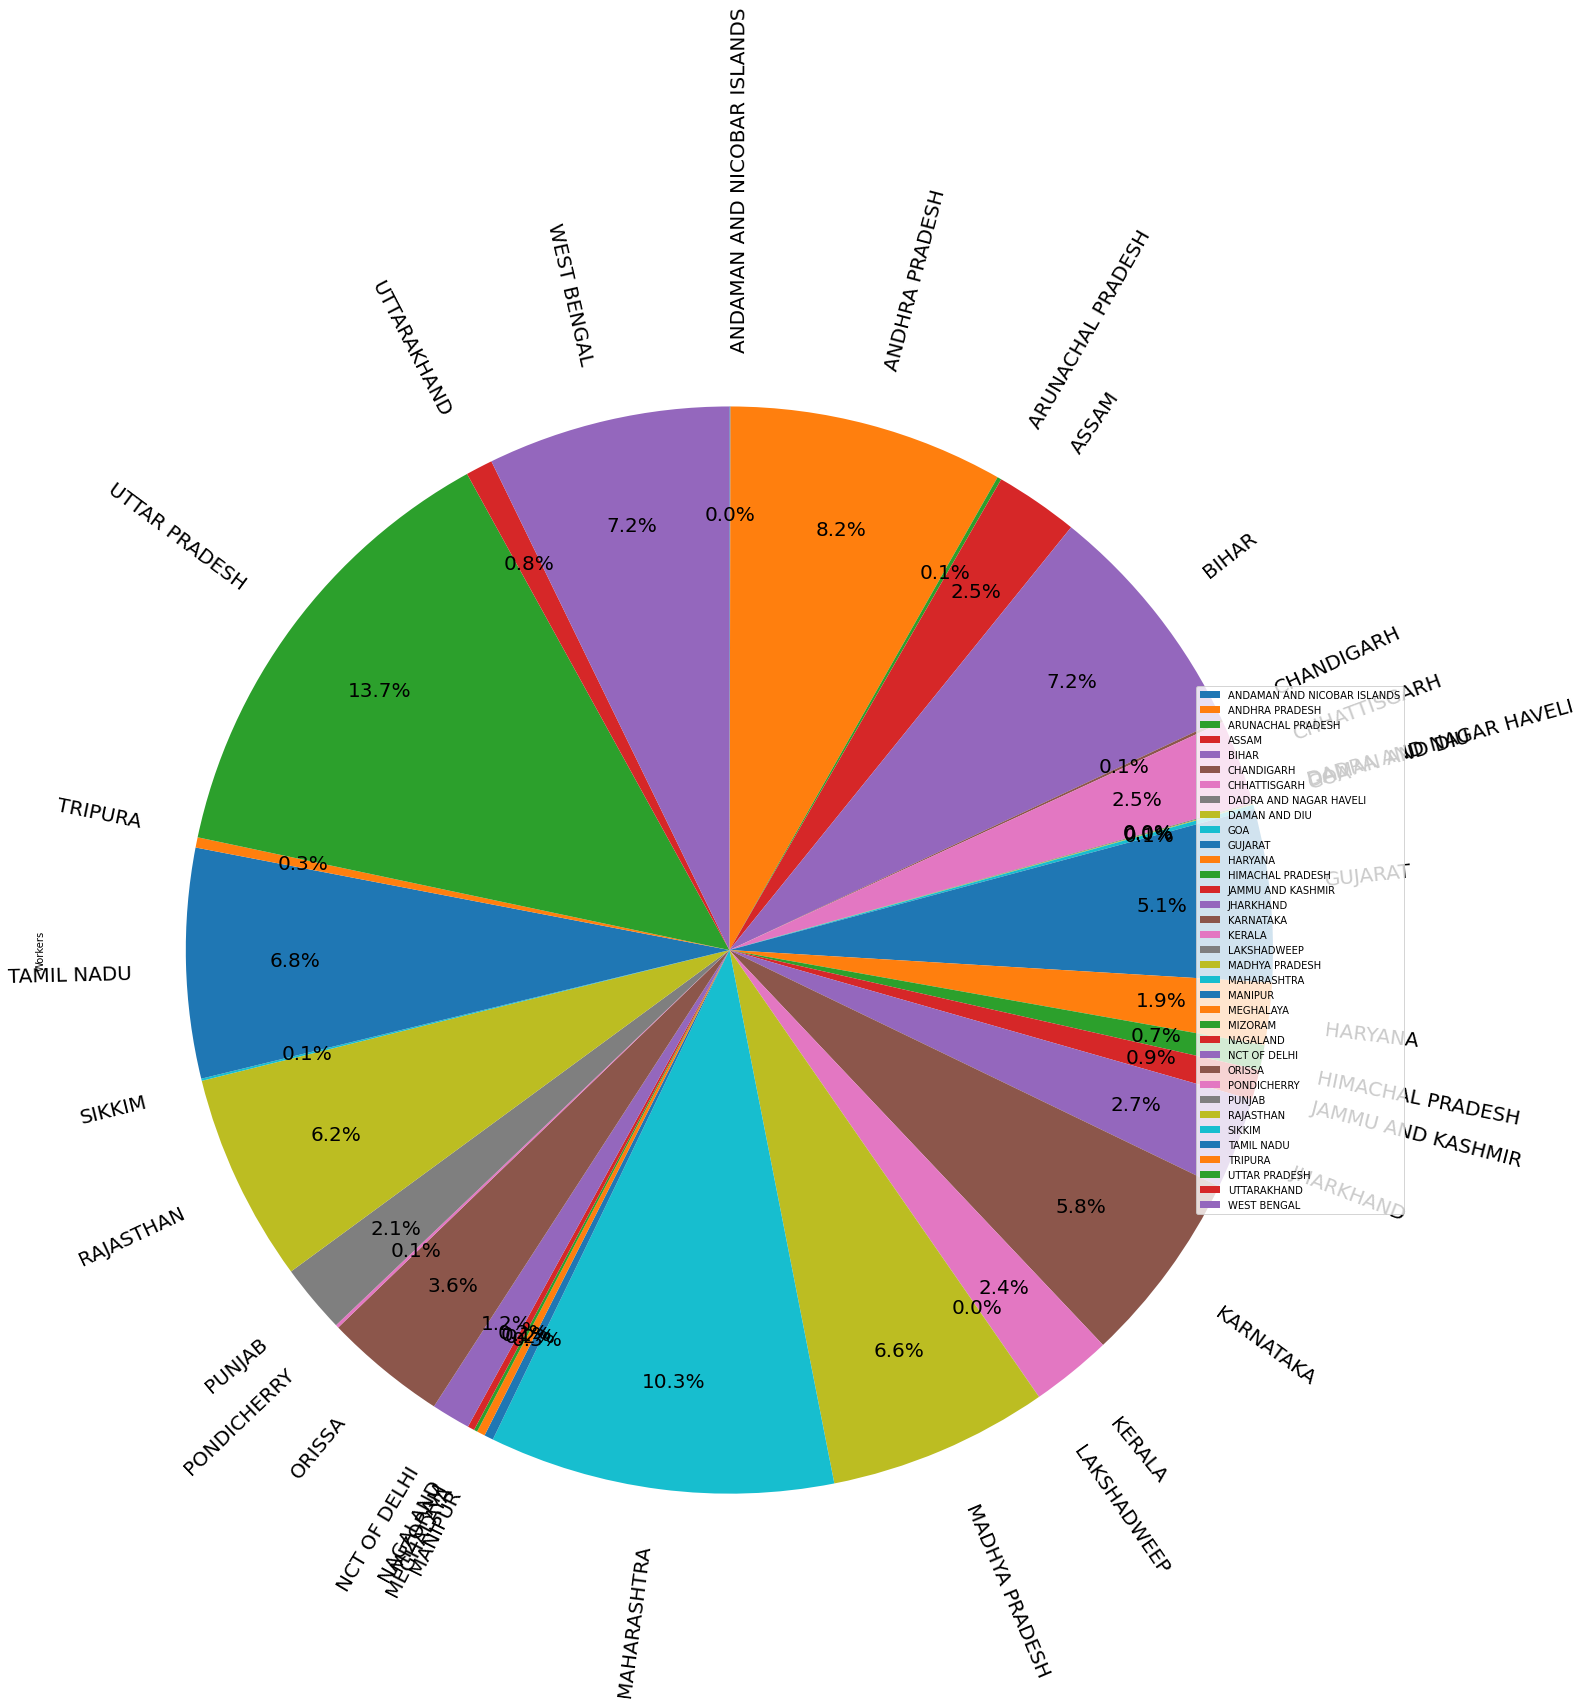

In [89]:
df.groupby('State_name')[['Workers']].sum().plot.pie(autopct='%1.1f%%',subplots=True,figsize=(30,25),
rotatelabels=True,fontsize=20,pctdistance=0.8,startangle=90,normalize=True,wedgeprops = {'linewidth': 5},counterclock=False)
plt.legend(loc="center right", fontsize=10)
plt.show()

Observation:
    
Uttar pradesh has the most number of workers which is 18.2%,
Followed by UP,Maharashtra secure the second position with 10.3% of workers.

## Which state has more number of male,female and household worker? 

In [21]:
df.groupby('State_name')[['Male_workers','Female_workers','Household_worker']].sum().sort_values(by=
            ['Male_workers','Female_workers','Household_worker'],ascending=False)

,Male_workers,Female_workers,Household_worker
State_name,,,
UTTAR PRADESH,49846762,15967953,3898590
MAHARASHTRA,32616875,16811003,1225426
WEST BENGAL,26716047,8040308,2464124
BIHAR,25222189,9502798,1411208
ANDHRA PRADESH,24185595,15237311,1439137
TAMIL NADU,21434978,11449703,1364893
MADHYA PRADESH,20146970,11427163,959259
RAJASTHAN,18297076,11589179,720573
KARNATAKA,18270116,9602481,913227


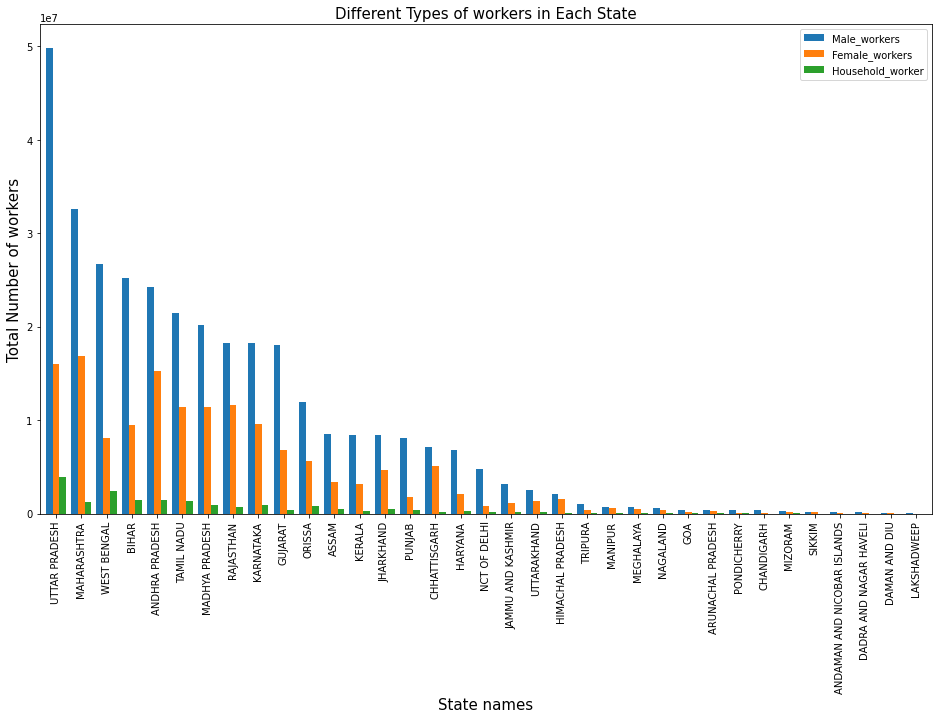

In [22]:
df.groupby('State_name')[['Male_workers','Female_workers','Household_worker']].sum().sort_values(by=
            ['Male_workers','Female_workers','Household_worker'],ascending=False).plot.bar(figsize=(16,9),width=0.8)
plt.title('Different Types of workers in Each State',fontsize=15)
plt.ylabel('Total Number of workers',fontsize=15)
plt.xlabel('State names',fontsize=15)
plt.show()

In [52]:
df.head(2)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_workers,Female_workers,Household_worker,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduation_education,Age_Group_0_29,Age_group_30_49,Age_group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978


## Which state has most and least numbers of literate?

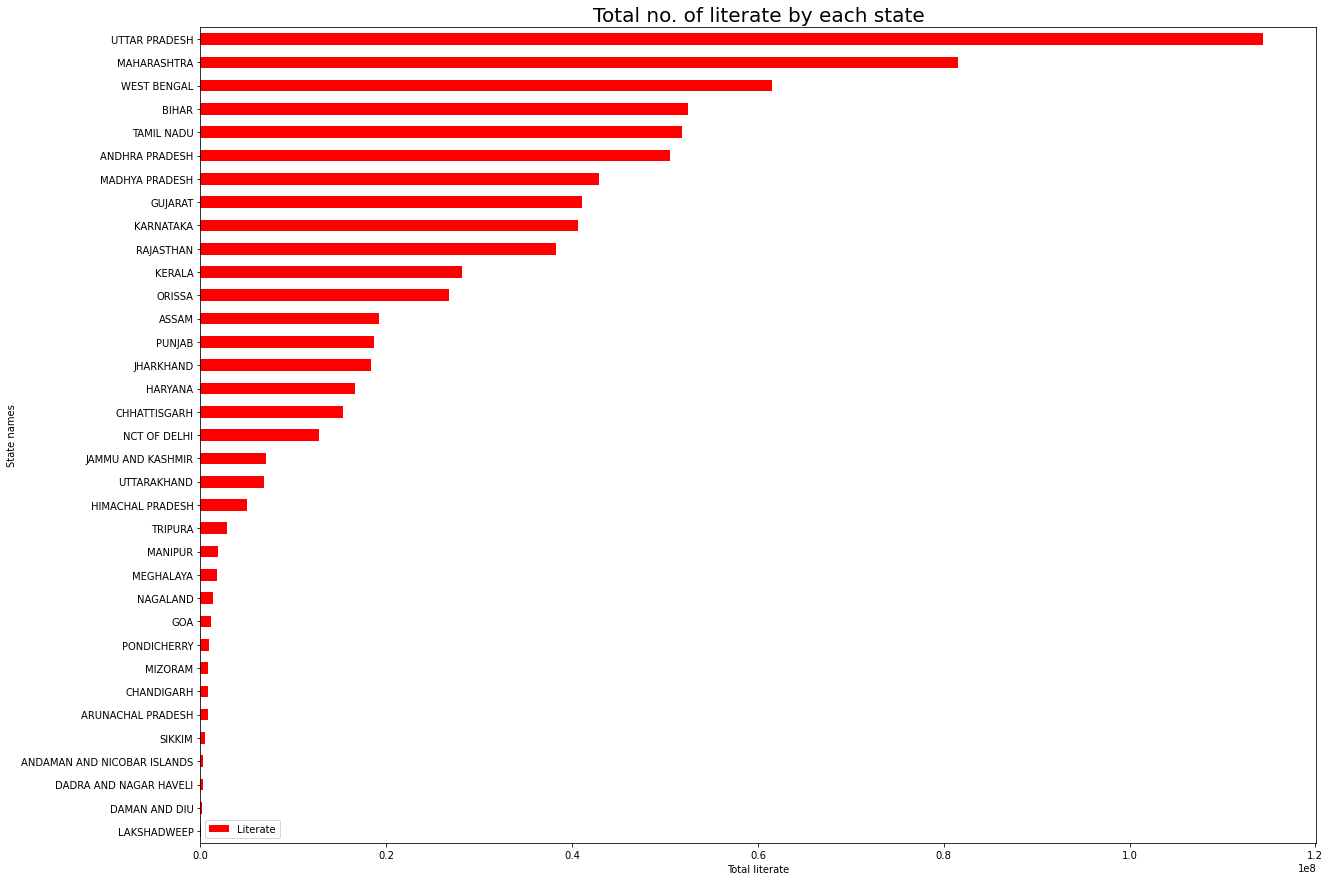

In [51]:
df.groupby('State_name')[['Literate']].sum().sort_values(by = 'Literate').plot.barh(color='r',figsize=(20,15))
plt.title('Total no. of literate by each state',fontsize=20)
plt.xlabel('Total literate',fontsize=10)
plt.ylabel('State names',fontsize=10)
plt.show()

Observation:
    
Uttar pradesh,Maharashtra and West bengal has most number of literates,
On the other hand Dadra,Daman and diu and Lakshadweep has least number of literates.

## State-wise classification of Education

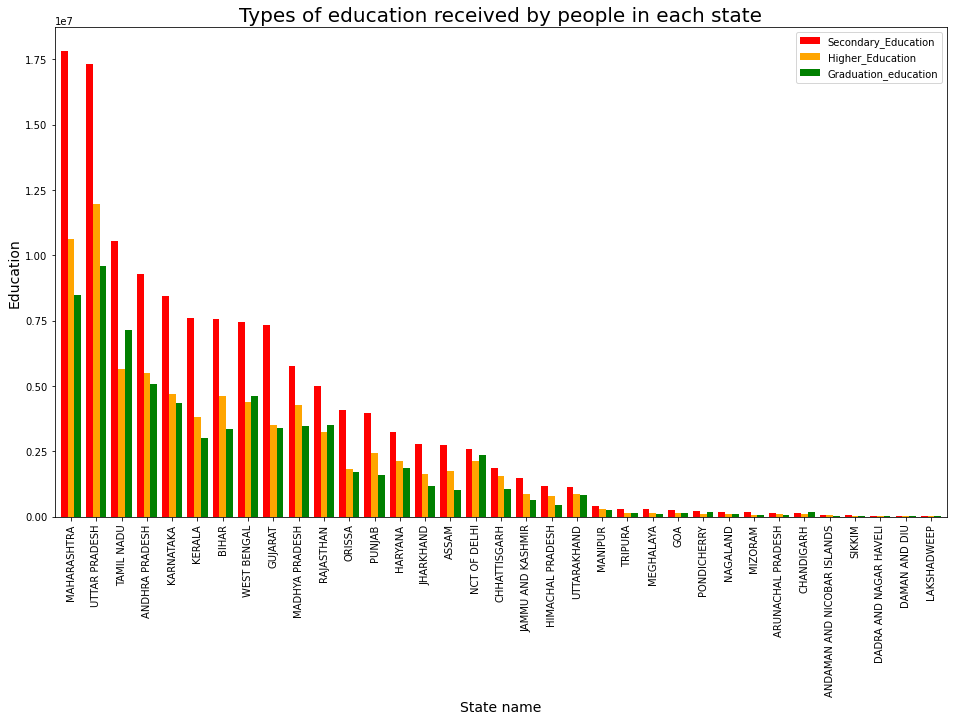

In [97]:
df.groupby('State_name')[['Secondary_Education','Higher_Education','Graduation_education']].sum().sort_values(by=
['Secondary_Education','Higher_Education','Graduation_education'],ascending=False).plot.bar(color=['red','orange','green'],
figsize=(16,9),width=0.8)
plt.title('Types of education received by people in each state',fontsize=20)
plt.xlabel('State name',fontsize=14)
plt.ylabel('Education',fontsize=14)
plt.show()


Observation:

Maximum number of people in maharashtra are getting secondary,higher and graduation education.This shows maharashtra has good
literacy percentage as compared to other states.

# Thank YOU..!!!